In [1]:
reset -fs

In [106]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
#read CSV file
df = pd.read_csv('final_data2.csv')

In [4]:
df=df.drop(['Unnamed: 0'], axis=1 )

In [5]:
df.head()

,movie_name,domestic_gross,movie_budget,running_time,widest_release,rel_year,rel_month,G,PG,PG-13,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Bad Boys for Life,206.305244,90.0,124.0,3775.0,2020.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Sonic the Hedgehog,148.974665,85.0,99.0,4198.0,2020.0,2.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,Birds of Prey,84.158461,84.5,109.0,4236.0,2020.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dolittle,77.047065,175.0,101.0,4155.0,2020.0,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,The Invisible Man,70.410000,7.0,124.0,3636.0,2020.0,2.0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [6]:
df.corr()

,domestic_gross,movie_budget,running_time,widest_release,rel_year,rel_month,G,PG,PG-13,R,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
domestic_gross,1.000000,0.642535,0.308567,0.586173,0.045833,0.053938,0.047462,0.081624,0.133398,-0.185052,...,-0.113678,-0.030197,0.099000,-0.124100,-0.080709,0.277595,-0.042887,-0.110431,0.002926,0.004511
movie_budget,0.642535,1.000000,0.387019,0.545183,0.135902,0.091997,0.077782,0.108493,0.232505,-0.323900,...,-0.233940,-0.107933,0.066745,-0.189376,-0.137186,0.381459,-0.040957,-0.127462,-0.004072,0.058962
running_time,0.308567,0.387019,1.000000,0.088261,-0.150684,0.018758,-0.084638,-0.240011,0.193215,-0.007076,...,-0.264549,-0.007993,-0.077119,-0.095613,0.000911,0.123905,0.079250,0.008489,0.145108,0.121280
widest_release,0.586173,0.545183,0.088261,1.000000,0.217141,0.070380,0.022582,0.135226,0.115101,-0.153599,...,-0.012005,-0.074677,0.002922,-0.037126,-0.060047,0.221482,-0.028105,-0.015580,-0.054092,0.041834
rel_year,0.045833,0.135902,-0.150684,0.217141,1.000000,0.456787,0.024694,0.076488,0.010553,-0.087700,...,0.108945,-0.026628,0.016876,0.070708,-0.006318,0.109493,-0.025508,0.055453,-0.085778,-0.076960
rel_month,0.053938,0.091997,0.018758,0.070380,0.456787,1.000000,0.068588,0.075629,-0.038277,-0.045293,...,0.012771,0.027941,0.082928,-0.012183,-0.066912,-0.004742,0.061380,-0.013001,-0.027727,-0.031588
G,0.047462,0.077782,-0.084638,0.022582,0.024694,0.068588,1.000000,-0.042521,-0.080132,-0.069750,...,-0.036900,0.091300,0.139474,-0.035293,-0.037621,-0.046588,0.113112,-0.064487,-0.015909,-0.009809
PG,0.081624,0.108493,-0.240011,0.135226,0.076488,0.075629,-0.042521,1.000000,-0.401686,-0.349641,...,-0.128067,0.041247,0.273411,-0.110767,-0.020220,-0.032332,0.078154,-0.307581,-0.065106,-0.025849
PG-13,0.133398,0.232505,0.193215,0.115101,0.010553,-0.038277,-0.080132,-0.401686,1.000000,-0.658900,...,-0.031513,-0.008085,-0.127268,-0.011439,0.113656,0.192474,-0.000751,0.061635,0.007246,-0.003048
R,-0.185052,-0.323900,-0.007076,-0.153599,-0.087700,-0.045293,-0.069750,-0.349641,-0.658900,1.000000,...,0.152183,-0.043675,-0.143076,0.116612,-0.087458,-0.166126,-0.087651,0.180615,0.042847,0.029987


In [7]:
df.columns

Index(['movie_name', 'domestic_gross', 'movie_budget', 'running_time',
       'widest_release', 'rel_year', 'rel_month', 'G', 'PG', 'PG-13', 'R',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

# Train / validate data set

In [72]:
#TRAIN_TEST_SPLIT (80/20)

#CREATE TRAIN/VALIDATION/TEST SETS

#set X and y as datasets

X = df.loc[:,['movie_budget', 'running_time',
       'widest_release', 'rel_year', 'rel_month', 'G',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western']]
y = df['domestic_gross']

#Split data into two sections: Train+Val, Testing

#results in 20 test, 80 training

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [33]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

# Linear Regression

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
# Check the R-squared value of the model on the training data
train_r_squared = lr.score(X_train_scaled, y_train)
print(f"{train_r_squared:,.2f}")

0.49


In [75]:
# Check the R-squared value of the model on the test data
X_val_scaled = scaler.fit_transform(X_val)
val_r_squared = lr.score(X_val_scaled, y_val)
print(f"{val_r_squared:,.2f}")

0.56


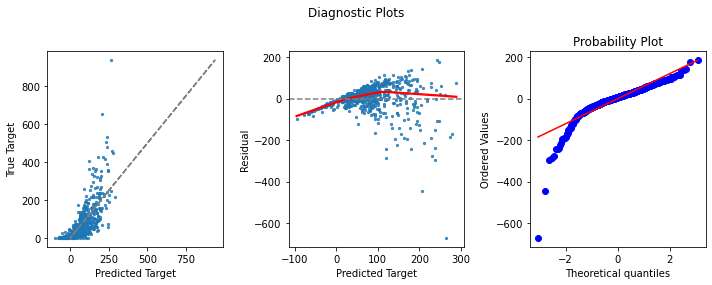

In [111]:
diagnostic_plots(lr.predict(X_train_scaled), y_train)
plt.savefig('train_pred', dpi=200,bbox_inches="tight")

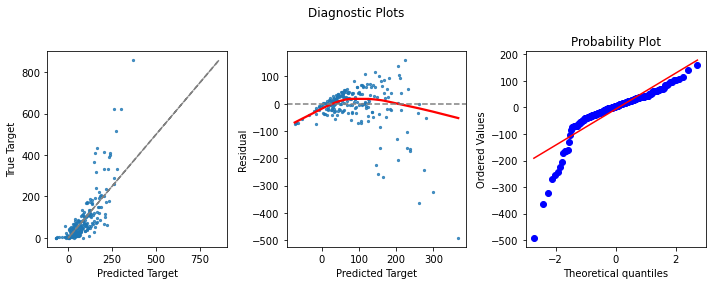

In [110]:
diagnostic_plots(lr.predict(X_val_scaled), y_val)
plt.savefig('Val_pre', dpi=200,bbox_inches="tight")

In [78]:
model=sm.OLS(y_train,sm.add_constant(X_train_scaled))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     21.90
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.54e-72
Time:                        23:55:36   Log-Likelihood:                -3609.1
No. Observations:                 642   AIC:                             7274.
Df Residuals:                     614   BIC:                             7399.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.2344      2.699     28.620      0.000      71.935      82.534
x1            32.2242      4.620      6.976      0.000      23.152      41.296
x2            10.2987      3.809      2.704      0.007       2.819      17.779
x3            40.0145      3.445     11.616      0.000      33.250      46.779
x4            -7.5247      3.451     -2.180      0.030     -14.302      -0.747
x5             0.8128      3.154      0.258      0.797      -5.382       7.007
x6            -3.1991      2.799     -1.143      0.253      -8.696       2.297
x7            -8.1113      3.802     -2.133      0.033     -15.579      -0.644
x8             1.0085      3.932      0.257      0.798      -6.712       8.729
x9             4.4790      4.264      1.050      0.294      -3.894      12.852
x10           -2.5666      3.404     -0.754      0.451      -9.251       4.118
x11           -3.1638      3.823     -0.828      0.408     -10.672       4.344
x12            0.2228      3.209      0.069      0.945      -6.080       6.526
x13           -0.5588      2.987     -0.187      0.852      -6.425       5.307
x14           -3.2904      3.480     -0.946      0.345     -10.124       3.544
x15           -6.8782      4.776     -1.440      0.150     -16.258       2.501
x16           -8.3506      3.418     -2.443      0.015     -15.064      -1.637
x17           -2.8673      3.040     -0.943      0.346      -8.838       3.103
x18            2.2112      3.749      0.590      0.556      -5.152       9.574
x19            1.6556      3.046      0.544      0.587      -4.326       7.637
x20           10.4603      3.023      3.461      0.001       4.525      16.396
x21           -3.4136      3.177     -1.075      0.283      -9.652       2.825
x22           -3.0859      3.073     -1.004      0.316      -9.120       2.948
x23            2.5121      3.181      0.790      0.430      -3.735       8.759
x24           -3.1693      2.979     -1.064      0.288      -9.019       2.681
x25           -7.7099      3.656     -2.109      0.035     -14.889      -0.531
x26            2.5853      2.993      0.864      0.388      -3.293       8.464
x27           -6.2787      2.756     -2.279      0.023     -11.690      -0.867
==============================================================================
Omnibus:                      466.008   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11952.245
Skew:                           2.897   Prob(JB):                         0.00
Kurtosis:                      23.328   Cond. No.                         4.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction on train and validation data

In [80]:
# Compare the actual y_train values in the training set with the predicted values
y_actual_train = y_train
y_predicted_train = lr.predict(X_train_scaled)

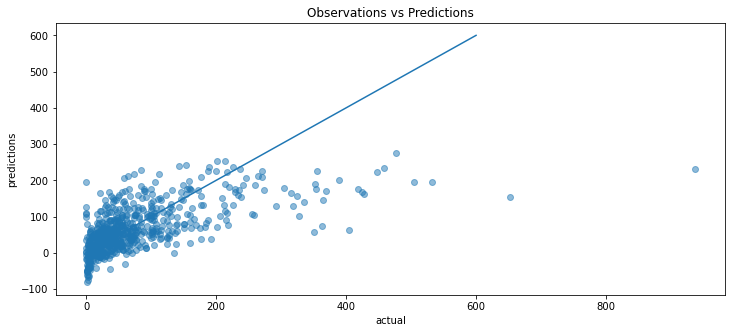

In [134]:
#actual Vs prediction for train data
plt.figure(figsize=(12,5))
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.scatter(y_actual_train, y_predicted_train, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('predictions')
plt.title("Observations vs Predictions");
plt.savefig('lasso_Traon_pred', dpi=200,bbox_inches="tight")

In [81]:
# r2 for train data set
r2_score(y_actual_train, y_predicted_train)

0.4906289065059387

In [82]:
from sklearn.metrics import mean_squared_error

In [84]:
# Check the RMSE (root mean squared error) on the training data
train_rmse = mean_squared_error(y_actual_train, y_predicted_train, squared=False)
print(f"{train_rmse:,.2f}")

66.87


In [102]:
# Compare the actual y values in the test set with the predicted values
y_actual_val = y_val
y_predicted_val = lr.predict(X_val_scaled)

In [85]:
# Check the RMSE (root mean squared error) on the test data
val_rmse = mean_squared_error(y_actual_val, y_predicted_val, squared=False)
print(f"{val_rmse:,.2f}")

77.56


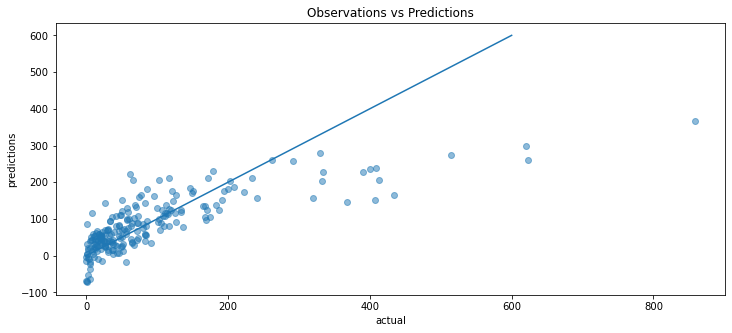

In [103]:
#Actual Vs prediction on valiodation data
plt.figure(figsize=(12,5))
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.scatter(y_actual_val, y_predicted_val, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('predictions')
plt.title("Observations vs Predictions");

# Lasso model

In [120]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)

# Fit a LASSO model for various alphas
print("\t\tTrain\tVal")

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 12.5,15.0, 20.0]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled,y_train)
    print(f"alpha={alpha}: \t{lasso.score(X_train_scaled,y_train):.4f} \t{lasso.score(X_val_scaled,y_val):.4f}")

		Train	Val
alpha=0.001: 	0.4906 	0.5872
alpha=0.01: 	0.4906 	0.5872
alpha=0.1: 	0.4906 	0.5873
alpha=1.0: 	0.4857 	0.5836
alpha=10.0: 	0.4288 	0.5035
alpha=12.5: 	0.4171 	0.4816
alpha=15.0: 	0.4068 	0.4631
alpha=20.0: 	0.3806 	0.4219


In [88]:
# fit lasso on train/ validation
lasso=Lasso(alpha=0.01)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.01)

In [113]:
y_actual_train = y_train
y_predicted_train = lasso.predict(X_train_scaled)

In [114]:
train_rmse_lasso = mean_squared_error(y_actual_train, y_predicted_train, squared=False)
print(f"{train_rmse_lasso:,.2f}")

74.38


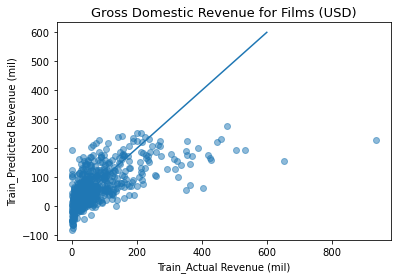

In [115]:
#lasso on train set
plt.scatter(y_actual_train, y_predicted_train, alpha=.5)
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.xlabel("Train_Actual Revenue (mil)")
plt.ylabel("Train_Predicted Revenue (mil)")
plt.title("Gross Domestic Revenue for Films (USD)", fontsize=13)

plt.savefig('Dom_Gross_train_laso.png')

In [128]:
# for validation

y_actual_val1 = y_val
y_predicted_val1 = lasso.predict(X_val_scaled)

In [129]:
val_rmse_lasso = mean_squared_error(y_actual_val1, y_predicted_val1, squared=False)
print(f"{val_rmse_lasso:,.2f}")

91.14


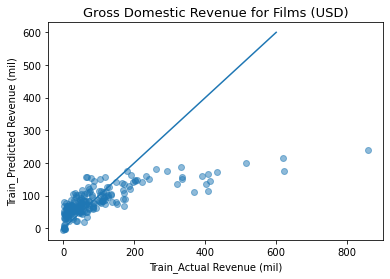

In [135]:
#lasso on Validation set
plt.scatter(y_actual_val, y_predicted_val, alpha=.5)
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.xlabel("Train_Actual Revenue (mil)")
plt.ylabel("Train_Predicted Revenue (mil)")
plt.title("Gross Domestic Revenue for Films (USD)", fontsize=13)

plt.savefig('lasso_val_laso.png')

In [91]:
list(zip(X,lasso.coef_))

[('movie_budget', 32.227848864104004),
 ('running_time', 10.292117828178998),
 ('widest_release', 39.99550532654513),
 ('rel_year', -7.500803402940719),
 ('rel_month', 0.7963913433143662),
 ('G', -3.182193608991283),
 ('Action', -8.072177265917645),
 ('Adventure', 0.9879755527388715),
 ('Animation', 4.439733230432707),
 ('Biography', -2.543066205026483),
 ('Comedy', -3.1248348256874254),
 ('Crime', 0.19576664695935986),
 ('Documentary', -0.5375981273399187),
 ('Drama', -3.2714544313390332),
 ('Family', -6.829320360604216),
 ('Fantasy', -8.335127572133063),
 ('History', -2.8520854492891705),
 ('Horror', 2.197093321002314),
 ('Music', 1.6385559693021674),
 ('Musical', 10.443566517046785),
 ('Mystery', -3.3915707545687988),
 ('Romance', -3.07381730563109),
 ('Sci-Fi', 2.5075589986299667),
 ('Sport', -3.1625488146692278),
 ('Thriller', -7.680278841134537),
 ('War', 2.566638565226737),
 ('Western', -6.266633148780446)]

# linear reg model  for Test

In [130]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_test_scaled, y_test)

LinearRegression()

In [131]:
y_test
lr.predict(X_test_scaled)

array([253.09954034,  49.52889128,  28.91111215,  -1.19442727,
       122.68130585,  79.98286013,  76.59966753,  86.62200339,
       111.74021938, -10.68080249,  92.30586272,  24.66546056,
       114.29900421,  82.5549922 ,  69.33499501,  94.82718693,
        43.29508236,  83.26051286, -31.99808461,  62.52236004,
        71.62074622,  39.65679005, 165.14405928,  37.32799073,
        90.99614839,  76.23918947,  76.02818204, 148.7704823 ,
        27.5136993 ,  80.32217384,  68.99252504,   3.97317003,
       112.42625068,  63.90789433,  88.8787435 ,   3.91748963,
       -10.28845882,  60.52975317, 214.43673534, 152.69902969,
        12.97910579,  52.7986944 ,  24.53410686,  49.72029018,
        97.82215282,  39.67647925,  76.16823204,   5.05103848,
        60.3589421 ,  92.33166892, -40.81172735,  14.18559329,
       158.88248136, 128.02472063,  41.09290636,  25.53562859,
       206.38544001, 137.49615486, 226.18407813, 127.48326833,
        41.52194496, 132.44173658,  17.8903723 , 154.67

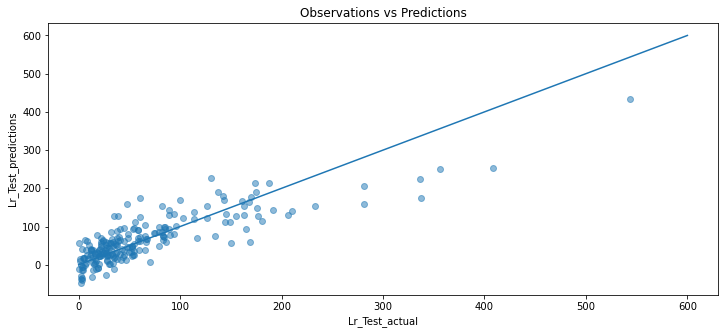

In [133]:
plt.figure(figsize=(12,5))
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.scatter(y_test, lr.predict(X_test_scaled), alpha=0.5)
plt.xlabel('Lr_Test_actual')
plt.ylabel('Lr_Test_predictions')
plt.title("Observations vs Predictions");

In [132]:
r2_score(y_test, lr.predict(X_test_scaled))

0.7108267518610591

In [136]:
test_LR_rmse = mean_squared_error(y_test, lr.predict(X_test_scaled), squared=False)
print(f"{test_LR_rmse:,.2f}")

40.72
